# 1-9 Vector Space Models

In [1]:
# IMPORTS
from pathlib import Path
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set plt parameters
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (10,5)

In [2]:
# To see a list of all the files
# for p in Path('../data/shakespeare').glob('**/*.txt'):
#     print(f"{p.name}\n")

# by subdirectory
for p in Path('../data/shakespeare/histories/').glob('*.txt'):
    with open(p, mode="r", encoding="utf-16") as f:
        print(f"{p.name}: {f.read()[0:20]}")

Henry VI 1.txt: < Shakespeare -- THE
Richard II.txt: < Shakespeare -- THE
Henry VI 2.txt: < Shakespeare -- THE
Henry V.txt: < Shakespeare -- THE
Henry VI 3.txt: < Shakespeare -- THE
John.txt: < Shakespeare -- THE
Henry VIII.txt: 
< Shakespeare -- TH
Richard III.txt: < Shakespeare -- THE
Henry IV 2.txt: < Shakespeare -- THE
Henry IV 1.txt: < Shakespeare -- THE


In [3]:
# Create a list of strings

histories = []
for i in Path('../data/shakespeare/histories/').glob('*.txt'):
    with open(i, mode="r", encoding="utf-16") as f:
        contents = f.read()
        histories.append(contents)

# One way to check
print(len(histories))

# Inspect file contents 
print(histories[0][0:100])

10
< Shakespeare -- THE FIRST PART OF KING HENRY VI >
< from Online Library of Liberty (http://oll.libe


In [4]:
# We could write a function, but we are only doing this two more times...

tragedies = []
for i in Path('../data/shakespeare/tragedies/').glob('*.txt'):
    with open(p, mode="r", encoding="utf-16") as f:
        contents = f.read()
        tragedies.append(contents)

comedies = []
for i in Path('../data/shakespeare/comedies/').glob('*.txt'):
    with open(i, mode="r", encoding="utf-16") as f:
        contents = f.read()
        comedies.append(contents)

print(f"Comedies: {len(comedies)}, Tragedies {len(tragedies)}")

Comedies: 17, Tragedies 10


In [5]:
plays = histories + tragedies + comedies
print(f"We have a {type(plays)} of {len(plays)} texts.")

We have a <class 'list'> of 37 texts.


In [9]:
# Vectorize our texts while removing function words
# and words that occur in only one text
vectorizer = CountVectorizer(lowercase = True,
                             min_df = 2,
                             stop_words='english')

# fit the model to the data 
matrix = vectorizer.fit_transform(plays)

# We'll need these later
vocabulary = vectorizer.get_feature_names_out()

# see how many features we have
matrix.shape

(37, 11491)

In [10]:
# Convert to a dataframe
df = pd.DataFrame(matrix.toarray(), 
                  columns = vectorizer.get_feature_names_out())

df.head()

,10,100,11,12,13,14,15,16,17,18,...,youngest,younker,youth,youthful,youths,zeal,zealous,zounds,æneas,æsculapius
0,6,2,11,8,8,9,8,7,5,4,...,0,0,5,3,0,0,0,0,0,0
1,4,0,5,6,3,7,2,4,5,6,...,0,0,6,2,0,2,0,0,0,0
2,10,2,3,13,5,3,17,7,12,10,...,1,0,5,0,0,1,0,0,2,0
3,1,0,3,3,3,0,10,10,13,13,...,0,0,8,0,0,1,0,0,0,0
4,14,3,10,9,8,10,1,8,5,3,...,1,1,4,1,0,1,0,0,0,0


It would be nice to have titles to go with these rows.

Please note that like above, since we are only doing this three times and we want to make sure the order is the same as above, then 

In [11]:
titles= []

for p in Path('../data/shakespeare/histories/').glob('*.txt'):
    with open(p, mode="r", encoding="utf-16") as f:
        title = p.name[:-4]
        titles.append(title)

for p in Path('../data/shakespeare/tragedies/').glob('*.txt'):
    with open(p, mode="r", encoding="utf-16") as f:
        title = p.name[:-4]
        titles.append(title)

for p in Path('../data/shakespeare/comedies/').glob('*.txt'):
    with open(p, mode="r", encoding="utf-16") as f:
        title = p.name[:-4]
        titles.append(title)

print(len(titles), titles[0:2])

37 ['Henry VI 1', 'Richard II']


But what I really want is to capture both the title of the play as well as its genre.

In [12]:
def genremator(folder):
    titles =[]
    for p in Path('../data/shakespeare/'+folder+'/').glob('*.txt'):
        with open(p, mode="r", encoding="utf-16") as f:
            title = p.name[:-4]
            titles.append(title)
    genre = [folder] * len(titles)
    gandt = [(x, y) for x, y in zip(genre, titles)] 
    return gandt

In [14]:
hist = genremator("histories")
print(hist)

trag = genremator("tragedies")
print(trag)

com = genremator("comedies")
print(com)

[('histories', 'Henry VI 1'), ('histories', 'Richard II'), ('histories', 'Henry VI 2'), ('histories', 'Henry V'), ('histories', 'Henry VI 3'), ('histories', 'John'), ('histories', 'Henry VIII'), ('histories', 'Richard III'), ('histories', 'Henry IV 2'), ('histories', 'Henry IV 1')]
[('tragedies', 'Julius Caesar'), ('tragedies', 'Coriolanus'), ('tragedies', 'King Lear'), ('tragedies', 'Titus Andronicus'), ('tragedies', 'Timon of Athens'), ('tragedies', 'Othello, the Moor of Venice'), ('tragedies', 'Anthony and Cleopatra'), ('tragedies', 'Macbeth'), ('tragedies', 'Romeo And Juliet'), ('tragedies', 'Hamlet, Prince of Denmark')]
[('comedies', 'Winter’s Tale'), ('comedies', 'As You Like It'), ('comedies', 'Tempest'), ('comedies', 'Cymbeline'), ('comedies', 'Troilus and Cressida'), ('comedies', 'Twelfth-Night'), ('comedies', 'Loves Labours Lost'), ('comedies', 'Alls Well that Ends Well'), ('comedies', 'Much Ado About Nothing'), ('comedies', 'Pericles'), ('comedies', 'Two Gentlemen of Verona'

In [15]:
genre_titles = hist + trag + com

In [16]:
genres, titles = [list(t) for t in zip(*genre_titles)] 

In [17]:
df["genre"], df["title"] = genres, titles

In [18]:
df.head()

,10,100,11,12,13,14,15,16,17,18,...,younker,youth,youthful,youths,zeal,zealous,zounds,æneas,æsculapius,genre
0,6,2,11,8,8,9,8,7,5,4,...,0,5,3,0,0,0,0,0,0,histories
1,4,0,5,6,3,7,2,4,5,6,...,0,6,2,0,2,0,0,0,0,histories
2,10,2,3,13,5,3,17,7,12,10,...,0,5,0,0,1,0,0,2,0,histories
3,1,0,3,3,3,0,10,10,13,13,...,0,8,0,0,1,0,0,0,0,histories
4,14,3,10,9,8,10,1,8,5,3,...,1,4,1,0,1,0,0,0,0,histories


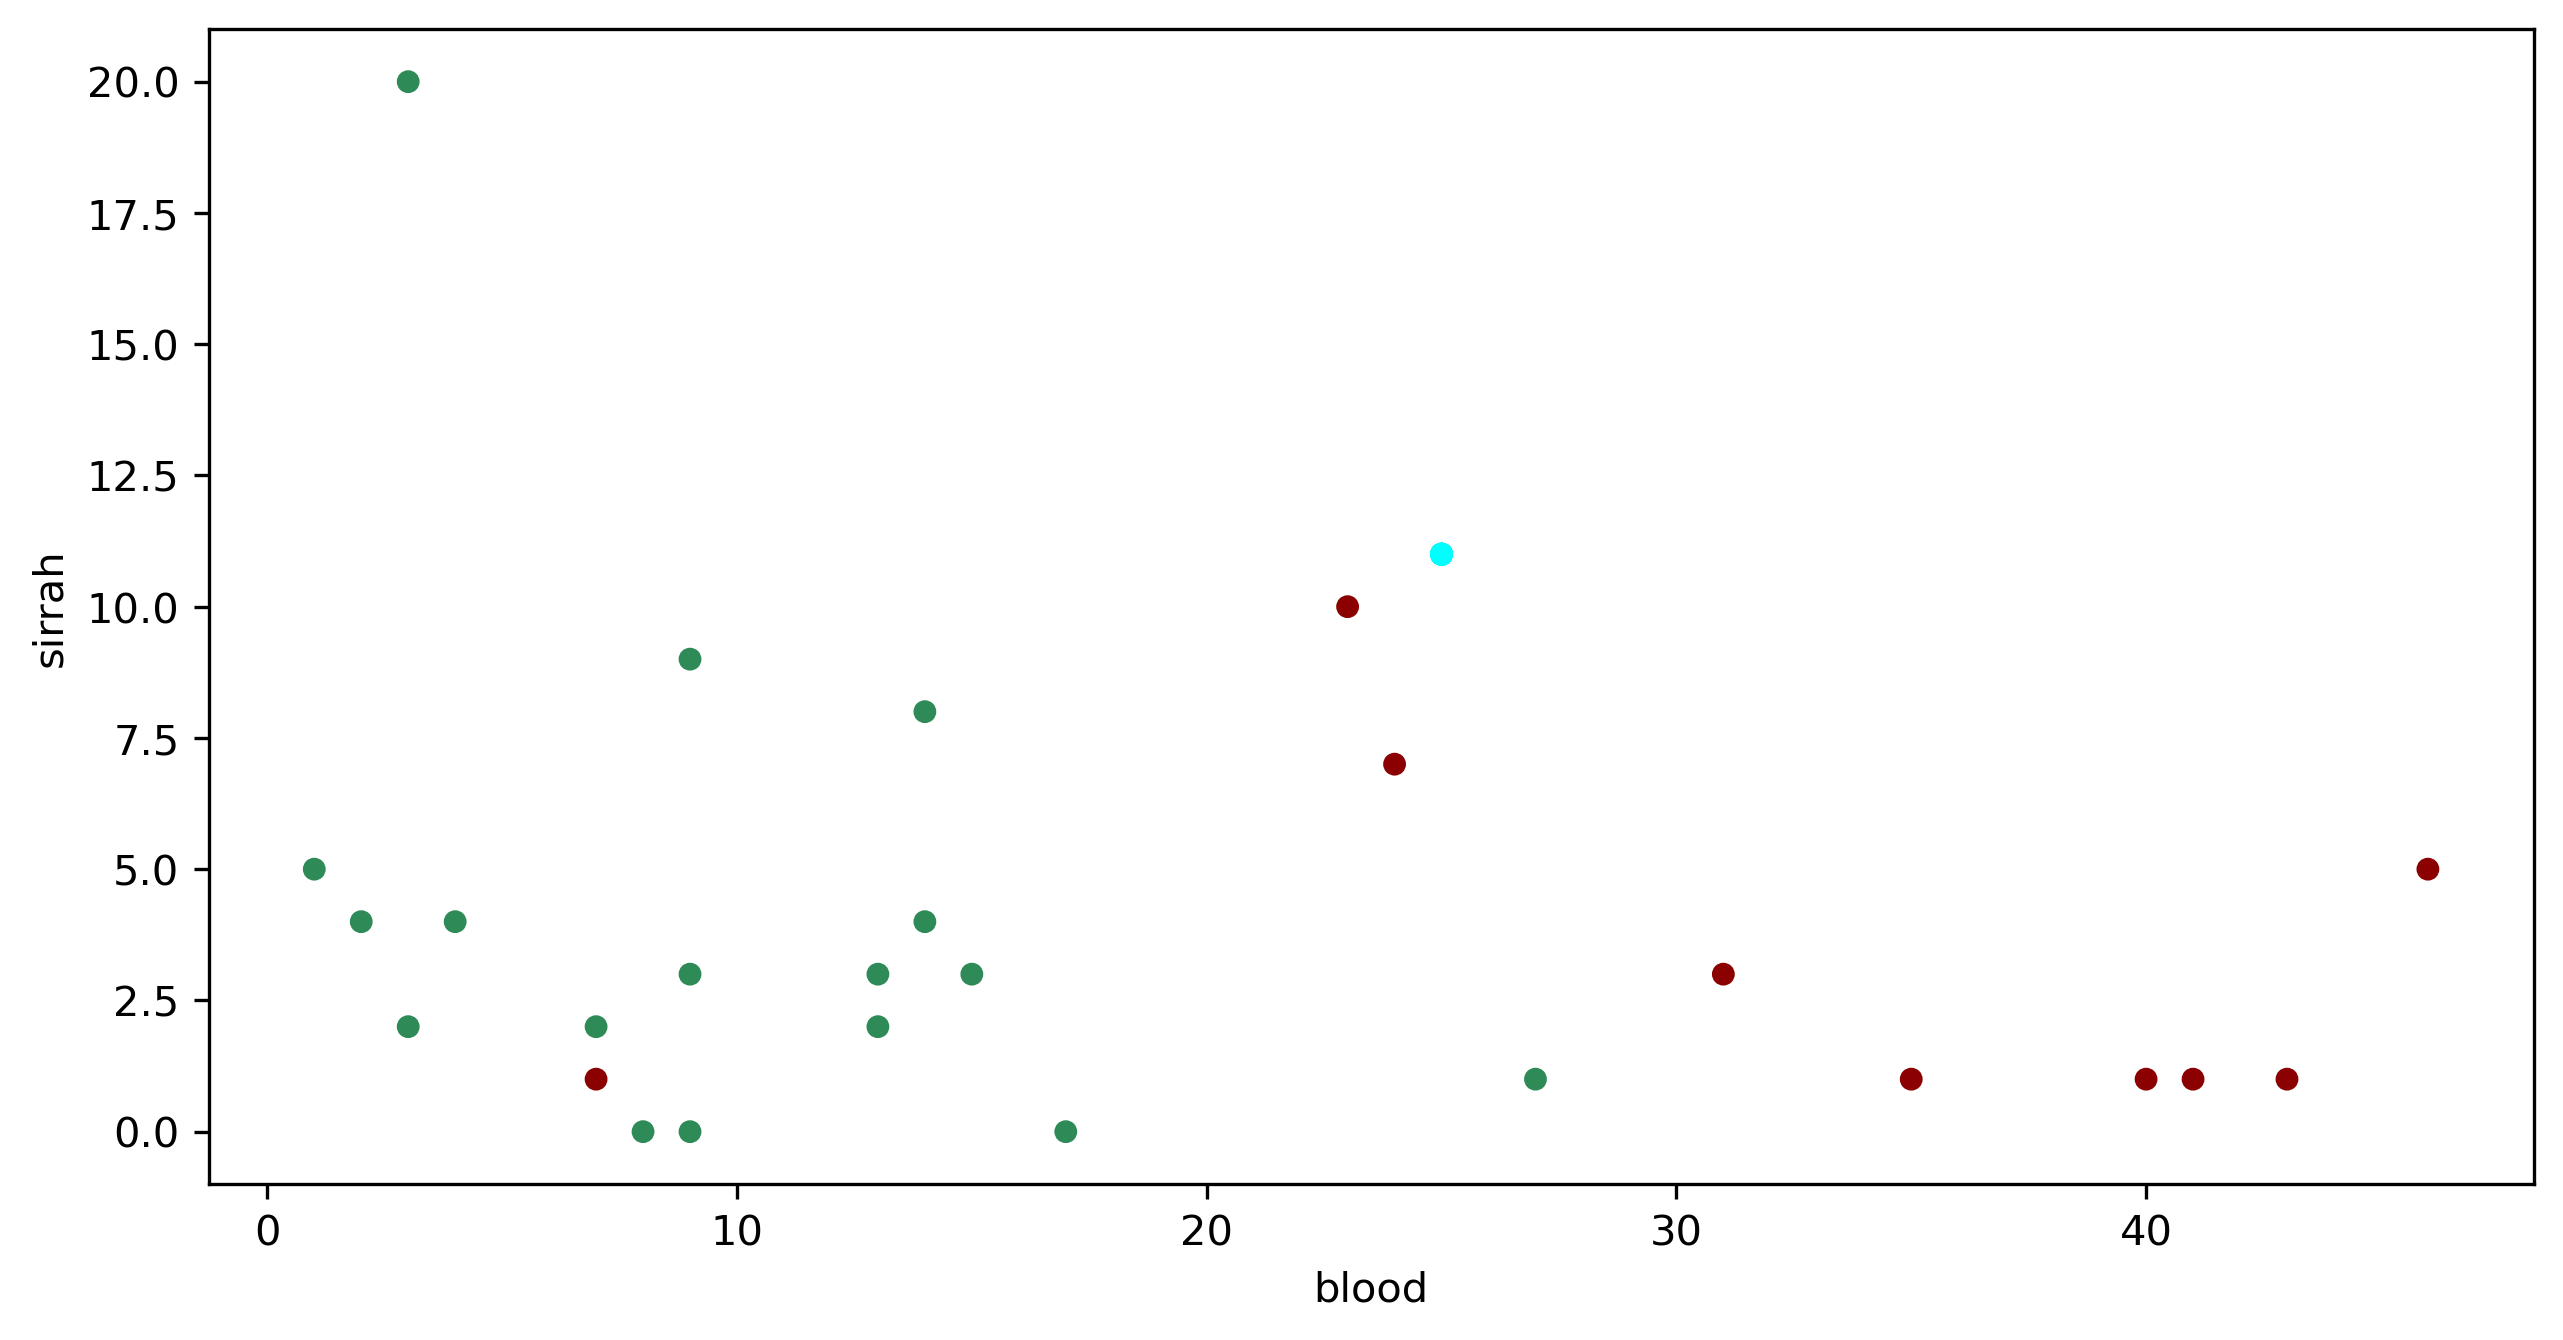

In [19]:
cmap = {"histories":"darkred", "tragedies":"cyan","comedies":"seagreen"}
ax = df.plot(kind="scatter", 
             x="blood",
             y="sirrah", 
             c=[cmap.get(c, 'black') for c in df.genre])
# ax.legend()

plt.show()

<div class="alert alert-block alert-success">
For the above with a legend, try the following:
<code>
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
ax.legend()
plt.show()
</code>
</div>

<div class="alert alert-block alert-info">
<p>Here's how to get the average of a column by group:<br/>
<code>df.groupby(['group_col'])['value_col'].mean()</code></p>
</div>

In [20]:
df.groupby(['genre'])['blood'].mean()

genre
comedies      9.882353
histories    31.500000
tragedies    25.000000
Name: blood, dtype: float64

In [21]:
df.groupby(['genre'])['sirrah'].mean()

genre
comedies      4.117647
histories     4.100000
tragedies    11.000000
Name: sirrah, dtype: float64

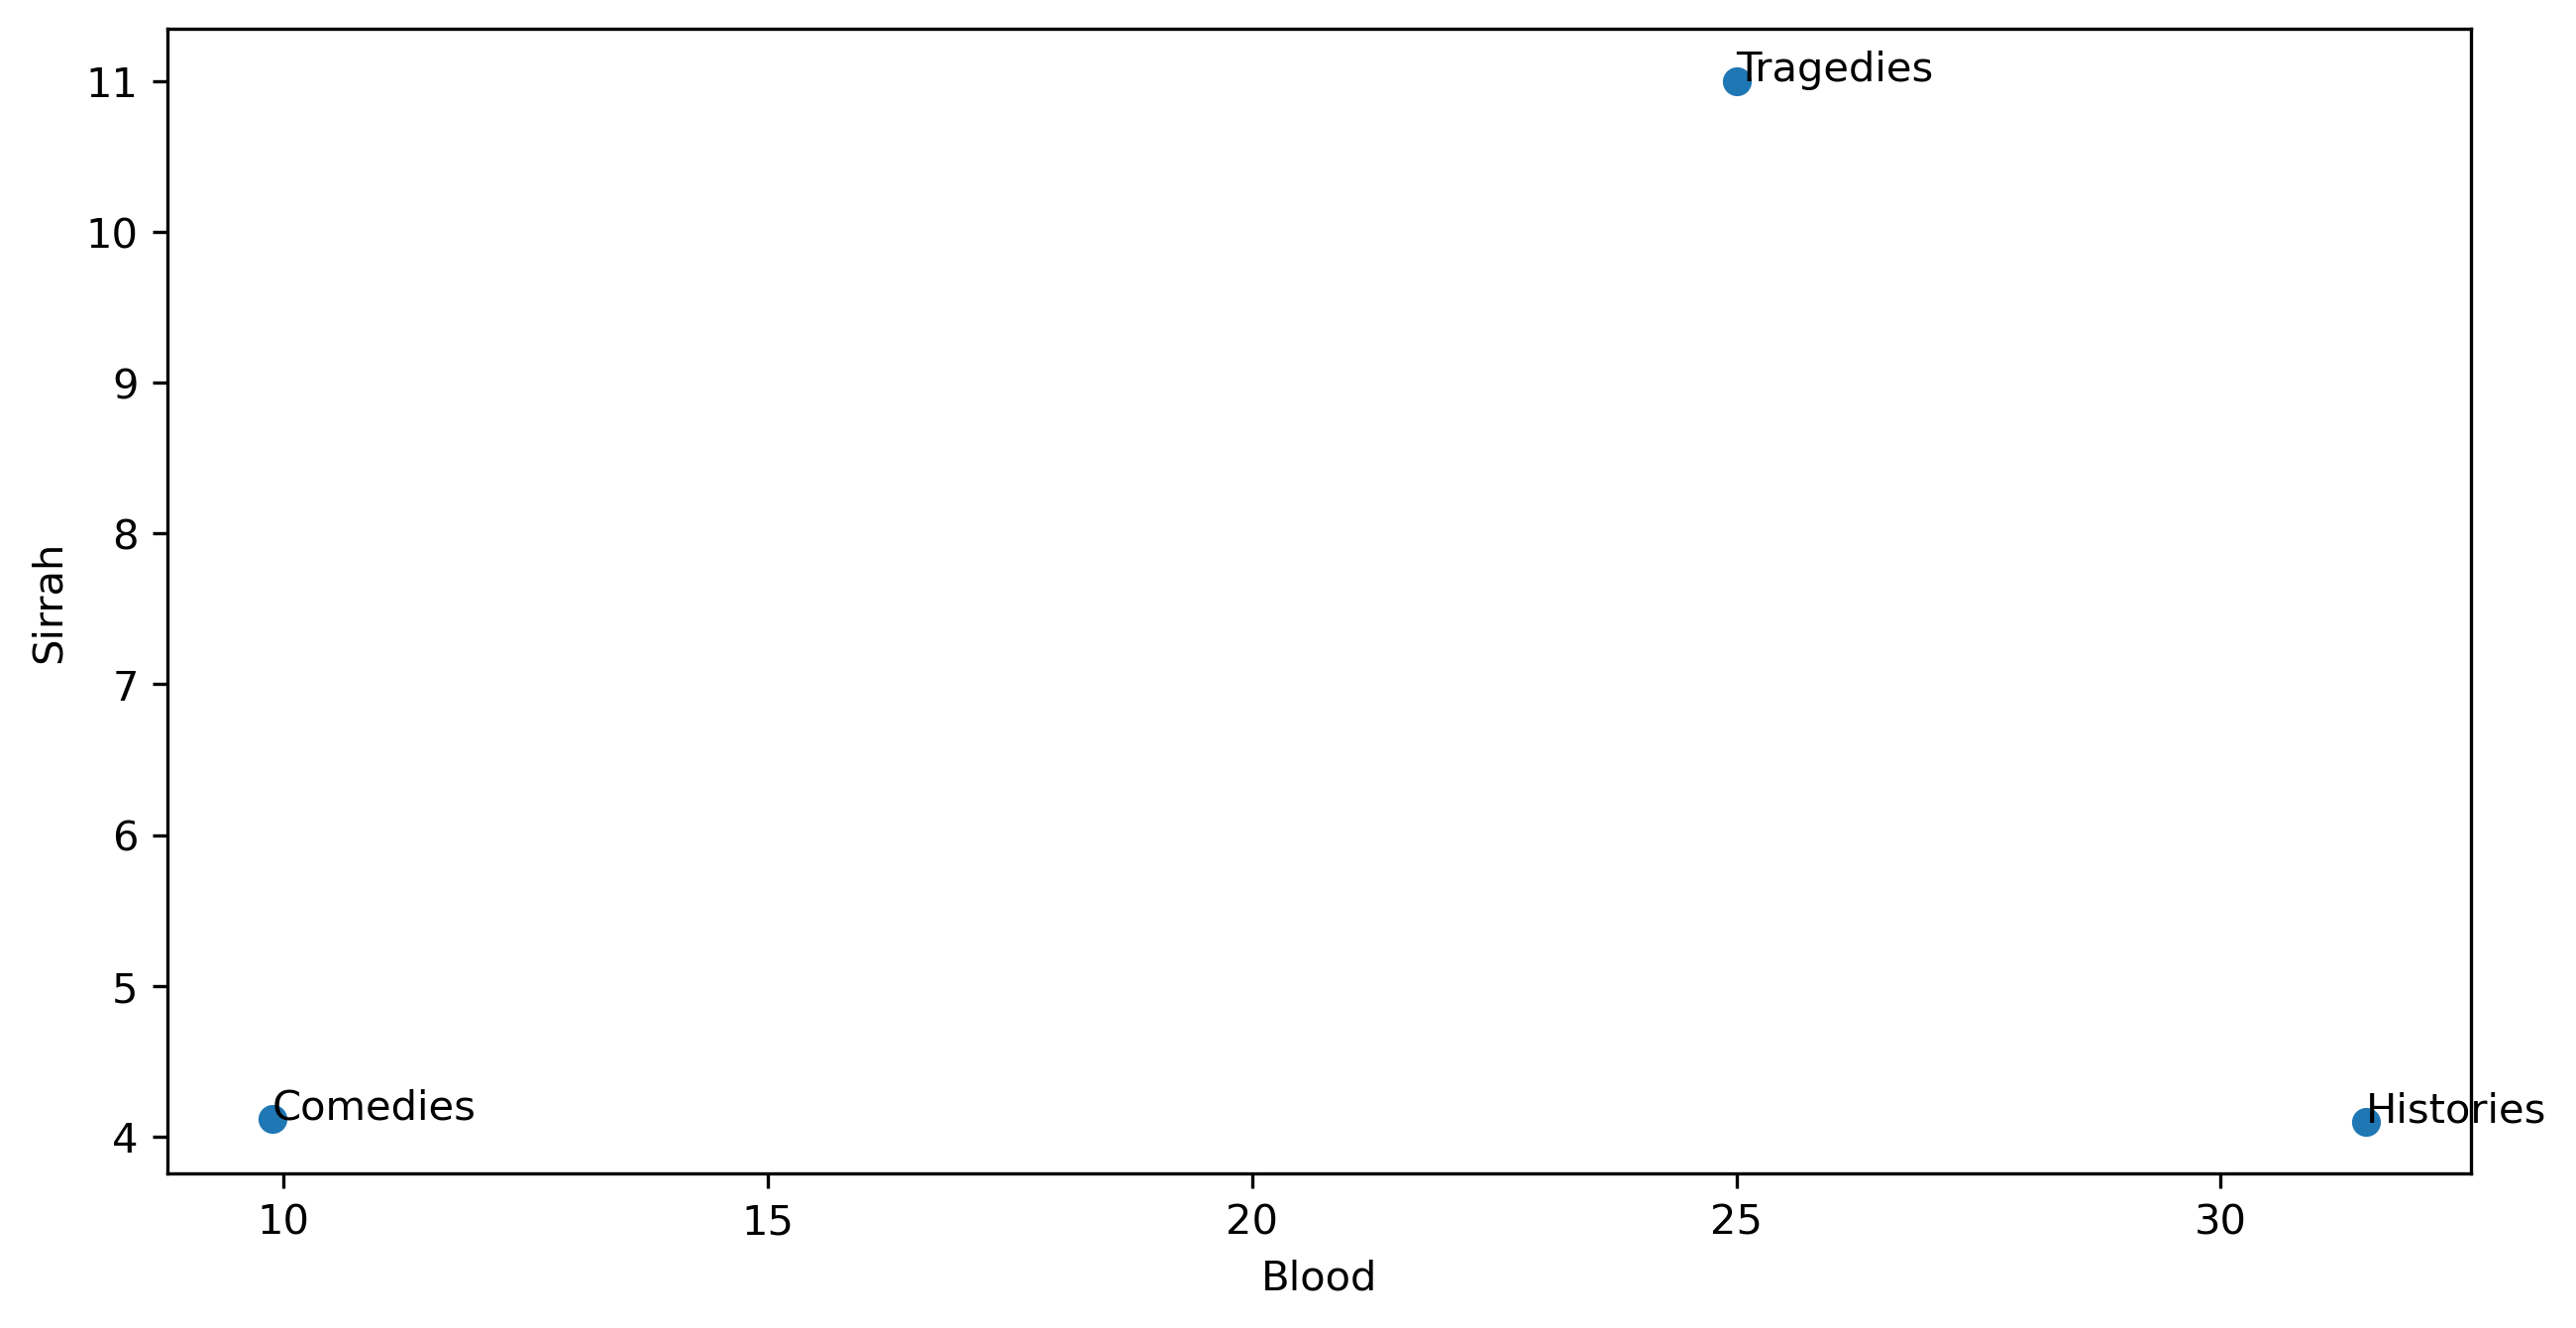

In [22]:
# Quick list of genres
labels = ["Comedies", "Histories", "Tragedies"]

# Get values from series
blood = df.groupby(['genre'])['blood'].mean().tolist()
sirrah = df.groupby(['genre'])['sirrah'].mean().tolist()

# Label the points
for i, label in enumerate(labels):
    plt.annotate(label, (blood[i], sirrah[i]))

# Generate the plot
plt.scatter(blood, sirrah)

# Label the axes
plt.xlabel('Blood')
plt.ylabel('Sirrah')
plt.show()


### Euclidean Distance

The distance we all know: the distance between two points is the positive value of the difference of those two points. (Here we square then take the square root, but this could also be achieved through using the absolute value `| a - b |`.
$$ d(a,b) = \sqrt{\sum_{i=1}^n (a_i - b_i)^2} $$

In [23]:
# Euclidean Distance
def euclid_distance(a,b):
    return np.sqrt(np.sum((a-b)**2))

In [24]:
c = np.array([blood[0], sirrah[0]])
h = np.array([blood[1], sirrah[1]])
t = np.array([blood[2], sirrah[2]])
print(c, h, t)

[9.88235294 4.11764706] [31.5  4.1] [25. 11.]


In [25]:
ch = euclid_distance(c, h)
print(f"Comedies to Histories: {ch:.2f}")

ct = euclid_distance(c, t)
print(f"Comedies to Tragedies: {ct:.2f}")

th = euclid_distance(t, h)
print(f"Tragedies to Histories: {th:.2f}")

Comedies to Histories: 21.62
Comedies to Tragedies: 16.61
Tragedies to Histories: 9.48


### Cosine Distance

Euclidean distances are easy to understand but since they are dependent on the coordinates of the counts, they are sensitive to the length of documents. Such disparities in length might result in two similar texts being "distant." Cosine distance is often preferred because it returns a value between 0 and 1, normalizing distances.

$$ d_{cos}(a,b)= 1 - \frac{a \cdot b}{|a||b|}$$

In [ ]:
hist = genremator("histories")
print(hist)

In [26]:
def cos_distance (a, b):
    """Compute the cosine distance between two vectors
    Requires: numpy as np
    Arguments: numpy.ndarray (floats or integers)
    Returns: cosine distance as float
    Note: see also scipy.spatial.distance.cdist"""
    # Calculate Vector Lengths
    vl_a = np.sqrt(np.sum(a**2))
    vl_b = np.sqrt(np.sum(b**2))
    return 1 - np.dot(a, b) / (vl_a * vl_b)

In [27]:
ch_cos = cos_distance(c, h)
print(f"Comedies to Histories: {ch_cos:.2f}")

ct_cos = cos_distance(c, t)
print(f"Comedies to Tragedies: {ct_cos:.2f}")

th_cos = cos_distance(t, h)
print(f"Tragedies to Histories: {th_cos:.2f}")

Comedies to Histories: 0.04
Comedies to Tragedies: 0.00
Tragedies to Histories: 0.04


If we look at our graph, these results seem surprising: the comedies and histories are the furthest apart. This particular result is a product of our dimension reduction which has *sirrah* on the Y-axis. Since both comedies and histories are "low" on *sirrah*, they look the same. 

<div class="alert alert-block alert-warning">
<b>Your Turn</b>: Take a look at the words in the plays and see if you can find another word that, like <em>blood</em>, distinguishes the three genres.
</div>